继承是面向对象编程的一个重要的方式，因为通过继承，子类就可以扩展父类的功能。

回忆一下Animal类层次的设计，假设我们要实现以下4种动物：

    - Dog - 狗狗；
    - Bat - 蝙蝠；
    - Parrot - 鹦鹉；
    - Ostrich - 鸵鸟。
如果按照哺乳动物和鸟类归类，我们可以设计出这样的类的层次：
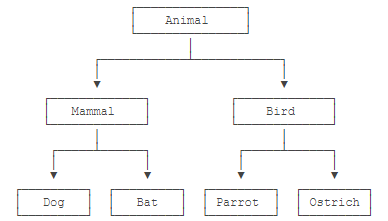

但是如果按照“能跑”和“能飞”来归类，我们就应该设计出这样的类的层次：
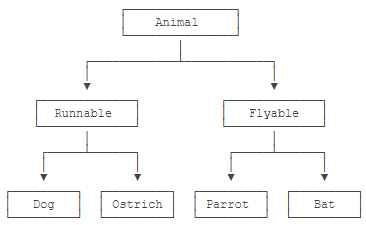

如果要把上面的两种分类都包含进来，我们就得设计更多的层次：

    - 哺乳类：能跑的哺乳类，能飞的哺乳类；
    - 鸟类：能跑的鸟类，能飞的鸟类。
    
这么一来，类的层次就复杂了：
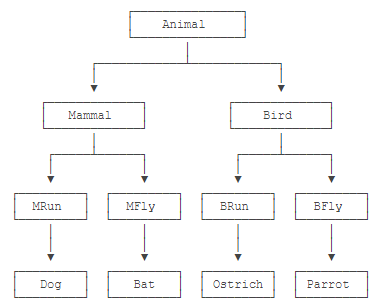

如果要再增加“宠物类”和“非宠物类”，这么搞下去，类的数量会呈指数增长，很明显这样设计是不行的。

正确的做法是采用多重继承。首先，主要的类层次仍按照哺乳类和鸟类设计：

In [1]:
class Animal(object):
    pass

# 大类:
class Mammal(Animal):
    pass

class Bird(Animal):
    pass

# 各种动物:
class Dog(Mammal):
    pass

class Bat(Mammal):
    pass

class Parrot(Bird):
    pass

class Ostrich(Bird):
    pass

现在，我们要给动物再加上Runnable和Flyable的功能，只需要先定义好Runnable和Flyable的类：

In [2]:
class Runnable(object):
    def run(self):
        print('Running...')

class Flyable(object):
    def fly(self):
        print('Flying...')

对于需要Runnable功能的动物，就多继承一个Runnable，例如Dog：

In [3]:
class Dog(Mammal, Runnable):
    pass

对于需要Flyable功能的动物，就多继承一个Flyable，例如Bat：

In [4]:
class Bat(Mammal, Flyable):
    pass

通过多重继承，一个子类就可以同时获得多个父类的所有功能。
## Mixin
在设计类的继承关系时，通常，主线都是单一继承下来的，例如，Ostrich继承自Bird。但是，如果需要“混入”额外的功能，通过多重继承就可以实现，比如，让Ostrich除了继承自Bird外，再同时继承Runnable。这种设计通常称之为 __MixIn__。

为了更好地看出继承关系，我们把Runnable和Flyable改为RunnableMixIn和FlyableMixIn。类似的，你还可以定义出肉食动物CarnivorousMixIn和植食动物HerbivoresMixIn，让某个动物同时拥有好几个MixIn：

In [6]:
class Dog(Mammal, RunnableMixIn, CarnivorousMixIn):
    pass

NameError: name 'RunnableMixIn' is not defined

MixIn的目的就是给一个类增加多个功能，这样，在设计类的时候，我们优先考虑通过多重继承来组合多个MixIn的功能，而不是设计多层次的复杂的继承关系。

Python自带的很多库也使用了MixIn。举个例子，Python自带了TCPServer和UDPServer这两类网络服务，而要同时服务多个用户就必须使用多进程或多线程模型，这两种模型由ForkingMixIn和ThreadingMixIn提供。通过组合，我们就可以创造出合适的服务来。

比如，编写一个多进程模式的TCP服务，定义如下：

In [ ]:
class MyTCPServer(TCPServer, ForkingMixIn):
    pass

编写一个多线程模式的UDP服务，定义如下：

In [ ]:
class MyUDPServer(UDPServer, ThreadingMixIn):
    pass

如果你打算搞一个更先进的协程模型，可以编写一个CoroutineMixIn：

In [ ]:
class MyTCPServer(TCPServer, CoroutineMixIn):
    pass

这样一来，我们不需要复杂而庞大的继承链，只要选择组合不同的类的功能，就可以快速构造出所需的子类。
## 小结
由于Python允许使用多重继承，因此，MixIn就是一种常见的设计。

只允许单一继承的语言（如Java）不能使用MixIn的设计。